# **Data Preprocessing**



**1. Isi code-cell dibawah dengan kode untuk:**

*   membaca dataset seattle-weather
*   menampilkan 15 baris data teratas

In [28]:
import pandas as pd
import numpy as np
import missingno
dataset = pd.read_csv('/content/drive/MyDrive/Dataset/seattle-weather.csv', header=0)
dataset.head(16)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


**2. Munculkan informasi dataset dan lakukan cleaning data yang dibutuhkan:**


*   mengecek dan menghapus nilai kosong
*   menghapus (drop) kolom "date"
*   mengecek dan menghapus data yang memiliki nilai duplikat


In [31]:
df = pd.DataFrame(dataset)

# Tampilkan dataset sebelum penghapusan
print("Dataset sebelum penghapusan:")
print(df)

# Hapus baris yang memiliki nilai yang hilang
df_cleaned_rows = df.dropna()
print("\nDataset setelah menghapus baris yang memiliki nilai yang hilang:")
print(df_cleaned_rows)

# Hapus kolom yang memiliki nilai yang hilang
df_cleaned_cols = df.dropna(axis=1)
print("\nDataset setelah menghapus kolom yang memiliki nilai yang hilang:")
print(df_cleaned_cols)

# Hapus kolom date
df = pd.DataFrame(dataset)
df.drop(columns=['date'],inplace=True)
print("\nDataset setelah menghapus kolom date:")
print(df)

# Mengecek dan menghapus data duplikat
duplicate_values = df.duplicated()
print(duplicate_values)
df = df.drop_duplicates()
print(df)

Dataset sebelum penghapusan:
            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]

Dataset setelah menghapus baris yang memiliki nilai yang hilang:
            date  precipitation  temp_max  temp_min  wind  weather
0     201

**3. Visualisasi menggunakan diagram pie,**
buatlah visualisasi distribusi target-class seperti diatas!

Text(0.5, 1.02, 'Weather')

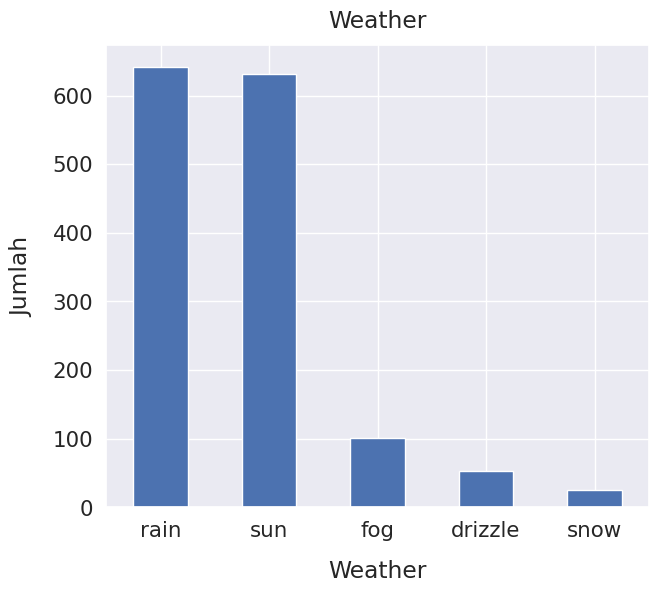

In [39]:
import seaborn as sns #untuk membuat grafik

sns.set(font_scale=1.4)
df['weather'].value_counts().plot(kind='bar', figsize=(7,6), rot=0)
plt.xlabel("Weather", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Weather", y=1.02)

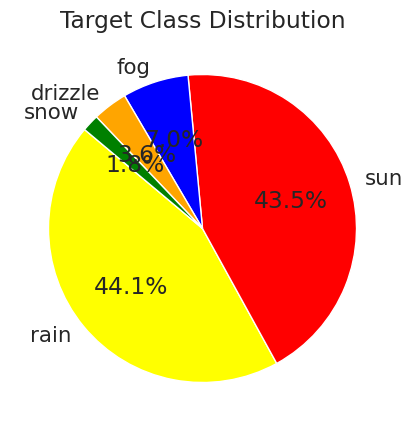

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Pie Chart untuk proporsi kategori target
weather_counts = df['weather'].value_counts()
labels = [f'{i}' for i in weather_counts.index]
colors = ['yellow', 'red', 'blue',  'orange', 'green', 'blue']

plt.figure(figsize=(5, 5))
plt.pie(weather_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Target Class Distribution')
plt.show()

**4. Anda akan melakukan visualisasi relasi antar fitur menggunakan diagram scatter.**
Perbaiki kata 'fix_me' pada code-cell dibawah!

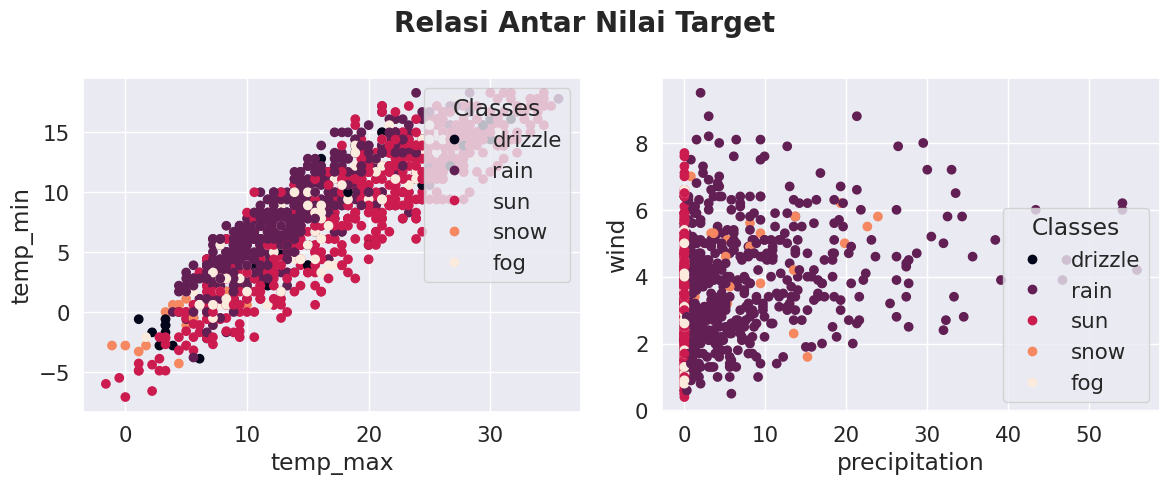

In [48]:
target_names= df['weather'].unique()
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
target = df['weather'].replace({
  'drizzle': 0,
  'rain': 1,
  'sun': 2,
  'snow': 3,
  'fog': 4
})

# Visualisasi relasi fitur temp_max dan temp_min
a_scatter =axs[0].scatter(df['temp_max'], df['temp_min'],
c=target)
axs[0].set(xlabel="temp_max", ylabel="temp_min")
axs[0].legend(a_scatter.legend_elements()[0], target_names,
loc="upper right", title="Classes")

# Visualisasi relasi fitur precipitation dan wind
b_scatter = axs[1].scatter(df['precipitation'], df['wind'],
c=target)
axs[1].set(xlabel="precipitation", ylabel="wind")
axs[1].legend(b_scatter.legend_elements()[0], target_names,
loc="lower right", title="Classes")
fig = fig.suptitle("Relasi Antar Nilai Target", fontsize=20,
fontweight="bold")
plt.tight_layout()

# **Modelling**

**5. Bagi dataset menjadi train-set dan test-set dengan ketentuan sebagai berikut:**

a. X = seluruh kolom fitur kecuali kolom target

b. y = kolom target

c. Bagi dengan rasio 70% train-set dan 30% test-set

In [75]:
from sklearn.model_selection import train_test_split #untuk evaluasi model machine learning
# Membagi Training dan Testing
X = df.iloc[:,1:8]
y = df['weather']
X = df.drop('weather', axis=1)
# Membagi data menjadi training = 70% dan testing = 30%
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=2022)

# Train-Test Split (70% train, 30% test)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=1)
print("\nDataFrame Train Setelah Train-Test Split:")
print(train_df.head(10))
print("\nDataFrame Test Setelah Train-Test Split:")
print(test_df.head(10))

# menampilkan ukuran data training dan data testing
trainRatio = round(X_train.shape[0]/len(df), 2)*100
testRatio = round(X_test.shape[0]/len(df), 2)*100

print(f'Train set: {X_train.shape[0]} ({trainRatio}%)')
print(f'Test set: {X_test.shape[0]} ({testRatio}%)')


DataFrame Train Setelah Train-Test Split:
      precipitation  temp_max  temp_min  wind weather
793            16.5      13.9       7.8   3.9    rain
1050            0.0       9.4      -2.1   4.2     sun
530             0.0      20.0      12.2   3.7     sun
1044            0.0      11.1       5.6   3.9     sun
865             0.0      26.7      12.8   3.0     sun
886             0.0      22.2      10.0   2.4     sun
494             0.0      22.8      10.0   1.3     sun
1255            0.0      28.9      14.4   2.7     sun
440             4.3      10.6       4.4   6.4    rain
420             0.0       8.9       5.0   5.5    rain

DataFrame Test Setelah Train-Test Split:
      precipitation  temp_max  temp_min  wind weather
633             2.0      16.1       9.4   3.0    rain
532             0.0      23.9      12.8   3.4     sun
1097            1.5       5.6       0.0   2.3    rain
560             0.0      27.8      12.8   3.0     sun
37              0.3      15.6       7.8   5.3    ra

In [70]:
y.head()

0    drizzle
1       rain
2       rain
3       rain
4       rain
Name: weather, dtype: object

In [73]:
X.head()

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


**6. Perbaiki kata 'fix_me' pada code-cell dibawah untuk menampilkan visualisasi rasio target-class pada train-set dan test-set!**


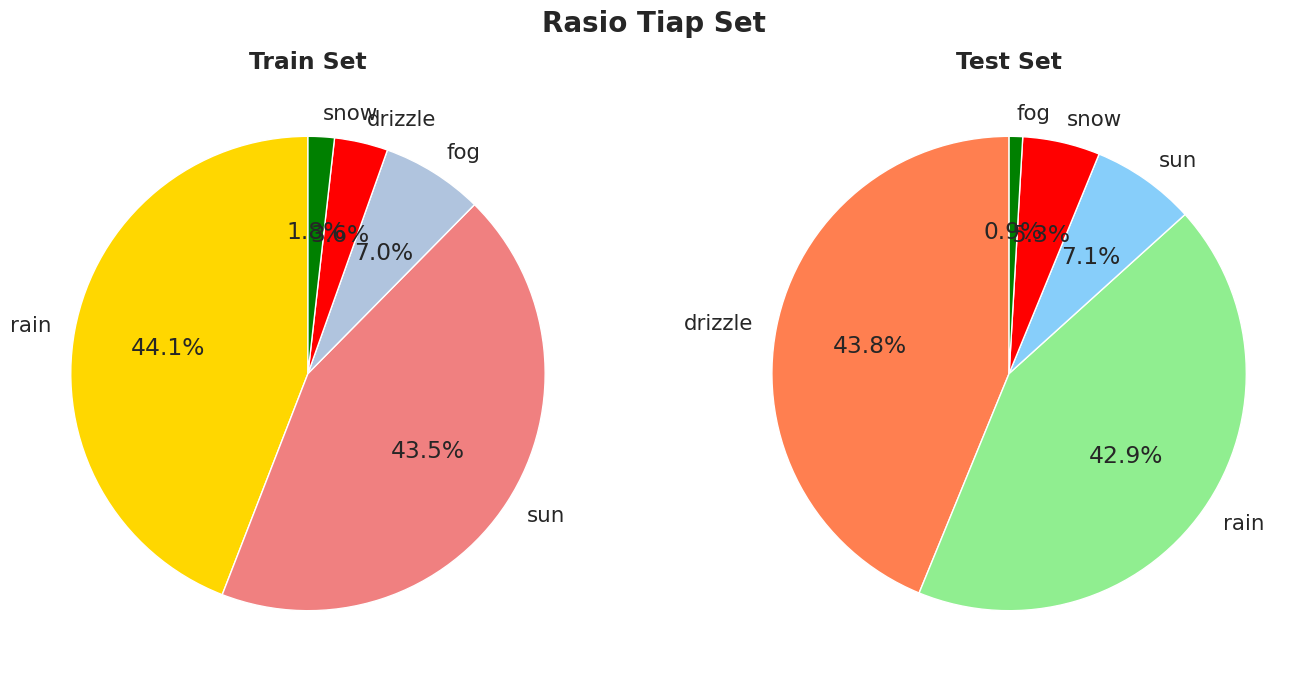

In [64]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
target_names = df['weather'].unique()
colors1 = ['gold', 'lightcoral', 'lightsteelblue', 'red', 'green']
colors2 = ['coral', 'lightgreen', 'lightskyblue', 'red', 'green']

#Train dataset
axs[0].pie(df['weather'].value_counts(), labels=labels,
colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Train Set", fontweight="bold")

#Test dataset
axs[1].pie(Y_test.value_counts(), labels=target_names,
colors=colors2, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Test Set", fontweight="bold")
fig = fig.suptitle("Rasio Tiap Set", fontsize=20,
fontweight="bold")
plt.tight_layout()

**7. Buatlah model dengan salah satu algoritma klasifikasi lalu latih dan prediksi dataset!**

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline

parameters_dt = {
                "model__max_depth": np.arange(1,21),
                "model__min_samples_leaf": np.arange(1,101,2),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [2023]
}
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier())
                          ])

In [81]:
classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [82]:
classifier_dt.fit(X_train,Y_train.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [2023]})

# **Evaluasi**

**8. Munculkan akurasi yang dihasilkan dari model yang anda gunakan.**

In [85]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

y_pred_dt_train = classifier_dt.predict(X_train)

accuracy_dt_train = accuracy_score(Y_train,y_pred_dt_train)
print('Akurasi pada training set: ', accuracy_dt_train)

precision_dt_train = precision_score(Y_train,y_pred_dt_train, average='micro')
print('Precision pada training set: ', precision_dt_train)

recall_dt_train = recall_score(Y_train,y_pred_dt_train, average='micro')
print('Recall pada training set: ', recall_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test)

accuracy_dt_test = accuracy_score(Y_test,y_pred_dt_test)
print('Akurasi pada test set: ', accuracy_dt_test)

precision_dt_test = precision_score(Y_test,y_pred_dt_test, average='micro')
print('Precision pada test set: ', precision_dt_test)

recall_dt_test = recall_score(Y_test,y_pred_dt_test, average='micro')
print('Recall pada test set: ', recall_dt_test)

Akurasi pada training set:  0.856440511307768
Precision pada training set:  0.856440511307768
Recall pada training set:  0.856440511307768
Akurasi pada test set:  0.8348623853211009
Precision pada test set:  0.8348623853211009
Recall pada test set:  0.8348623853211009


Kesimpulan dari pengolahan data diatas Model terbaik dari Dataset Prediksi Cuaca adalah menggunakan Decision Tree dengan nilai akurasi tertinggi pada Data Training sebesar 85% dan akurasi tertinggi pada Data Testing sebesar 83%. menggunakan dataset sebanyak 70% sebagai data training dan 30% sebagai data tes.

Hasil ini didapat dari pengolahan data yang diawali dengan menganalisis data, cek distribusi data membersihkan data yaitu dengan cari mencari data yang hilang dan diganti dengan menghapusnya di atribut tersebut dan menghapus nilai duplikat yang ada. Lalu data divisualisasikan target classnya dengan menggunakan diagram pie. Setelah itu, membuat visualisasi relasi antar fitur dengan menggunakan diagram scatter.

Dataset yang tersedia kita lakukan modelling dengan membagi dataset menjadi train-set dan test-set dengan ketentuan X kecuali kolom target dan Y merupakan kolom target. Dataset dibagi menjadi 2 dengan rasio 70% train-set dan 30% test-set. lalu kita lakukan visualisasi rasio target class pada train set dan test-set. Setelah itu kita membuat model dengan algoritma Decision Tree. dan kita menampilkan hasil akurasi yang dihasilkan oleh model tersebut.